# Piecewise Interpolation

## Introduction

Here we will split the interpolation domain into sub-domains (or elements) and use Polynomials that exist only within each sub-domain.

## Example
Consider the same function:

 $ f(x)=x^3+4x^2-10 $

and $x$ in the interval $\left[ {{-1},{1}} \right]$. Assume that we know the exact value of the function at points $[-1, -0.5, 0, 0.5, 1]$

In [1]:
#Try using matplotlib inline instead of matplotlib notebook to see the difference
#matplotlib notebook        
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import sympy as sym

### Lagrange function

Use our previosuly defined Lagrange function.

In [2]:
def LagrangPoly(x,order,i,xi=None): 
    if xi==None:
        xi=sym.symbols('x:%d'%(order+1))
    index = list(range(order+1))
    index.pop(i)
    return sym.prod([(x-xi[j])/(xi[i]-xi[j]) for j in index])

And the Lambda option to define the function.

In [3]:
fx = lambda x: x**3+4.0*x**2-10.0
fdx = lambda x: 3*x**2+8.0*x 
#
npts = 200
xx = np.linspace(-1, 1, npts)  #Assigns npts x-values between -1 and 1
x_data = np.array([-1, -0.5 , 0.0 , 0.5, 1])
fd = fx(x_data)

With the function at hand we compute the (known) values ready to be used in the interpolation scheme. These values will be stored in the array fd():

Evaluate the function at the npoints and plot it:

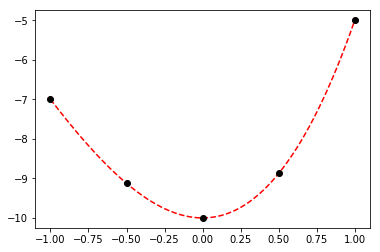

In [4]:
plt.figure(0)
yy = fx(xx)       #Here we evaluate the function at xx[:] and use vector slicing
plt.plot(xx, yy ,'r--')
plt.plot([-1, -0.5 , 0.0 , 0.5, 1], fd, 'ko')

### Lagrange Polynomials

We now compute (and plot) the polynomials only at each local sub-interval. Note that each Polynomial is of degree 1.

In [5]:
x= sym.symbols('x')
pol = []
pol.append(sym.simplify(LagrangPoly(x, 1, 0, [-1.0, -0.5])))
pol.append(sym.simplify(LagrangPoly(x, 1, 1, [-1.0, -0.5])))
pol.append(sym.simplify(LagrangPoly(x, 1, 0, [-0.5,  0.0])))
pol.append(sym.simplify(LagrangPoly(x, 1, 1, [-0.5,  0.0])))
pol.append(sym.simplify(LagrangPoly(x, 1, 0, [ 0.0,  0.5])))
pol.append(sym.simplify(LagrangPoly(x, 1, 1, [ 0.0,  0.5])))
pol.append(sym.simplify(LagrangPoly(x, 1, 0, [ 0.5,  1.0])))
pol.append(sym.simplify(LagrangPoly(x, 1, 1, [ 0.5,  1.0])))

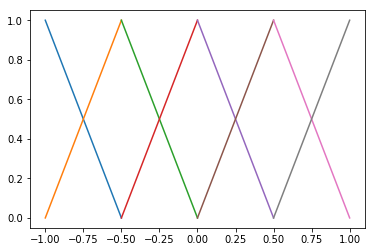

In [6]:
plt.figure()
xx = np.linspace(-1, -0.5, npts)
for k in range(2):
    for i in range(npts):
        yy[i] =  pol[k].subs([(x, xx[i])])
    plt.plot(xx, yy)
xx = np.linspace(-0.5, 0.0, npts)
for k in range(2):
    for i in range(npts):
        yy[i] =  pol[k+2].subs([(x, xx[i])])
    plt.plot(xx, yy)
#
xx = np.linspace(0.0, 0.5, npts)
for k in range(2):
    for i in range(npts):
        yy[i] =  pol[k+4].subs([(x, xx[i])])
    plt.plot(xx, yy)
#
xx = np.linspace(0.5, 1.0, npts)
for k in range(2):
    for i in range(npts):
        yy[i] =  pol[k+6].subs([(x, xx[i])])
    plt.plot(xx, yy)

### Interpolating polynomial $p(x)$ to approximate $f(x)$
Now we build the complete approximating polynomial $p(x)$. Since each polynomial is now local at each sub-domain we use:

$$p(x) = {L^L}(x)f({x^L}) + {L^R}(x)f({x^R})$$

where $f({x^L})$ and $f({x^R})$ are the function values at the left and right ends of the sub-domain respectively while ${L^L}(x)$ and ${L^R}(x)$ are the associated first-order polynomials.

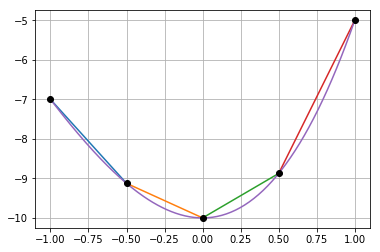

In [7]:
plt.figure()
plt.grid()
xx = np.linspace(-1.0, -0.5, npts)
for i in range(npts):
    yy[i] = fd[0]*pol[0].subs([(x, xx[i])]) + fd[1]*pol[1].subs([(x, xx[i])])
plt.plot(xx, yy)
xx = np.linspace(-0.5, 0.0, npts)
for i in range(npts):
    yy[i] = fd[1]*pol[2].subs([(x, xx[i])]) + fd[2]*pol[3].subs([(x, xx[i])])
plt.plot(xx, yy)
xx = np.linspace( 0.0, 0.5, npts)
for i in range(npts):
    yy[i] = fd[2]*pol[4].subs([(x, xx[i])]) + fd[3]*pol[5].subs([(x, xx[i])])
plt.plot(xx, yy)
xx = np.linspace( 0.5, 1.0, npts)
for i in range(npts):
    yy[i] = fd[3]*pol[6].subs([(x, xx[i])]) + fd[4]*pol[7].subs([(x, xx[i])])
plt.plot(xx, yy)
#
xx = np.linspace(-1.0, 1.0, npts)
zz = fx(xx)
plt.plot(xx, zz)
plt.plot([-1, -0.5, 0, 0.5, 1], fd, 'ko')

### First order derivative

In [8]:
dpol = []
for j in range(8):
    dpol.append(sym.diff(pol[j],x))

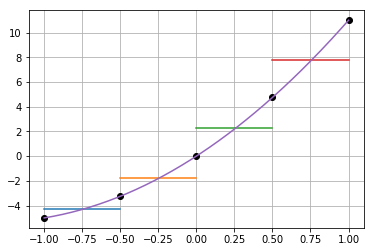

In [9]:
plt.figure()
plt.grid()
xx = np.linspace(-1.0, -0.5, npts)
for i in range(npts):
    yy[i] = fd[0]*dpol[0].subs([(x, xx[i])]) + fd[1]*dpol[1].subs([(x, xx[i])])
plt.plot(xx, yy)
xx = np.linspace(-0.5, 0.0, npts)
for i in range(npts):
    yy[i] = fd[1]*dpol[2].subs([(x, xx[i])]) + fd[2]*dpol[3].subs([(x, xx[i])])
plt.plot(xx, yy)
xx = np.linspace( 0.0, 0.5, npts)
for i in range(npts):
    yy[i] = fd[2]*dpol[4].subs([(x, xx[i])]) + fd[3]*dpol[5].subs([(x, xx[i])])
plt.plot(xx, yy)
xx = np.linspace( 0.5, 1.0, npts)
for i in range(npts):
    yy[i] = fd[3]*dpol[6].subs([(x, xx[i])]) + fd[4]*dpol[7].subs([(x, xx[i])])
plt.plot(xx, yy)
#
fc =fdx(x_data)
plt.plot([-1, -0.5, 0, 0.5, 1], fc, 'ko')

xx = np.linspace(-1.0, 1.0, npts)
for i in range(npts):
    zz[i]=fdx(xx[i])
plt.plot(xx, zz)

As a result of the local interpolation scheme the first derivative becomes discontinous. Although these disconitnuities introduce error in the solution these can be reduced using a larger number of sub-domains. In finite element analysis this corresponds to a refinement of the mesh.

### Class activity
#### Problem 1
For the function  $f(x) = {x^3} + 4{x^2} - 10$ in the range $[-1.0, 1.0]$:

* Find values at nodal points corresponding to 4 sub-domains each one with 3 nodal points and using these values implement a local interpolation scheme using 2-nd order interpolation polynomials.

* Plot the interpolation polynomial in each sub-domain and the corresponding interpolating function $p(x)$.

* In the same plot compare $p(x)$ and $f(x)$. Additionally, plot the first derivative of the function obtained from $p(x)$ and $f(x)$.

#### Problem 2
For the Runge function defined by:

$$f(x) = \frac{1}{{1 + 25{x^2}}}$$

implement an interpolation scheme using local 1st-order Lagrange polynomials using:
* (i) sub-domains of constant size $\Delta x = 0.2$
* (ii) sub-domains whose size decreases towards the edges of the interval.

#### Problem 3
Using an independent script or a notebook implement a local interpolation scheme using a canonical element of size $2.0$ and use it to approximate the Runge function from the previous problem.

In [10]:
# This bit of code is a class added to make the title nice  (thanks to @lorenABarba )
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()